In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats

ImportError: No module named 'pandas'

# CES

Load the dataset containing mRNA experession (Z-score) for the CES genes

In [264]:
df_ces = pd.read_table('data/expr_ces.txt')
df_ces.head()

,GENE_ID,COMMON,TCGA-AA-3860-01,TCGA-DM-A28A-01,TCGA-DC-5869-01,TCGA-F4-6460-01,TCGA-AA-A00N-01,TCGA-DY-A1DC-01,TCGA-AG-A01Y-01,TCGA-AA-A02F-01,...,TCGA-G4-6628-01,TCGA-AD-6965-01,TCGA-DC-6682-01,TCGA-G4-6299-01,TCGA-5M-AAT6-01,TCGA-CK-4950-01,TCGA-G4-6314-01,TCGA-AA-3833-01,TCGA-F5-6810-01,Unnamed: 635
0,1058,CENPA,NaN,0.2179,1.4571,-0.7924,NaN,1.5764,NaN,NaN,...,1.6777,2.0648,2.2440,-0.4601,-0.5838,0.8886,-0.2891,NaN,0.4476,NaN
1,64105,CENPK,NaN,0.0206,1.2963,-0.0141,NaN,0.1650,NaN,NaN,...,-0.4038,0.0965,0.2810,-0.2055,-0.2768,-0.5189,-0.0711,NaN,1.1868,NaN
2,91687,CENPL,NaN,1.6052,0.9938,0.2612,NaN,-0.2121,NaN,NaN,...,-0.1831,0.7087,1.2385,0.9041,0.6755,-0.0181,-0.3901,NaN,1.4739,NaN
3,79019,CENPM,NaN,-0.7380,-0.5356,-0.7788,NaN,-0.1759,NaN,NaN,...,-0.0182,-0.2657,-0.8896,-0.0877,0.4225,0.7416,0.3123,NaN,-0.5262,NaN
4,55839,CENPN,NaN,1.4574,1.3967,1.5256,NaN,0.1120,NaN,NaN,...,0.7582,1.2177,0.0459,-1.1639,0.5376,-0.0977,-0.3397,NaN,2.9461,NaN


Calculate CES for each patient

In [265]:
ces = []
for p in df_ces.columns[2:]:
    ces.append([p,df_ces[p].sum()])

ces = pd.DataFrame(ces)
ces.columns = ['id','ces']
print(len(ces))
ces.head()

634


,id,ces
0,TCGA-AA-3860-01,0.0000
1,TCGA-DM-A28A-01,6.4499
2,TCGA-DC-5869-01,7.8741
3,TCGA-F4-6460-01,-4.8967
4,TCGA-AA-A00N-01,0.0000


# MMR deficiency determination

The genes upreg are upregulated in MSS tumors, downreg are downregulated in MSS tumors

In [115]:
upreg = ['ANG','TFF2','SRSF6','SET','EIF5A','RARRES1' ,'CRIP1','CD55','IQGAP2','P4HA1',
         'TYMS','GLRX','NUCB2','FUT8','HNRNPL','PCCB','EIF5A','POLR2L','GTF2A2','GALNT1',
         'NDUFA9','TNNT1','AHR','PRKAR2B','ATP5A1','AMFR','OSTF1','CALM1','MANF','EWSR1',
         'SSR1','MFAP1','GNAQ','PPP2R5E','USP14','GCH1','KIF11','CASP2','SLC1A1','PGGT1B','RAB27B']
downreg = ['FTO','PLAGL1','STK38','DMD','NONO','CSNK1E','TCF7','POFUT1','OCRL','ELF1','LRP1','MLH1',
           'MARCKS','JUN','ELN','RAB32','TSC22D1','YWHAB','SEMA3C','GABRE','NEK3','PRKCI','TGFBR2',
           'FCGRT','CFTR','SERINC3','HSPH1','TDGF1','CYP2B7P']

In [116]:
mmr_patients = pd.read_table('data/cBioPortal_data_mrr.txt')
print(len(mmr_patients))
mmr_patients.head()

70


,GENE_ID,COMMON,TCGA-D5-6531-01,TCGA-DM-A28A-01,TCGA-DC-5869-01,TCGA-F4-6460-01,TCGA-DY-A1DC-01,TCGA-CM-5862-01,TCGA-CK-4947-01,TCGA-AH-6544-01,...,TCGA-QG-A5YW-01,TCGA-AF-6672-01,TCGA-F5-6464-01,TCGA-AA-3663-01,TCGA-G4-6299-01,TCGA-5M-AAT6-01,TCGA-CK-4950-01,TCGA-G4-6314-01,TCGA-F5-6810-01,Unnamed: 384
0,196,AHR,-0.2984,-1.0773,0.3750,-0.3260,-0.4386,0.1220,-0.3814,-0.1834,...,-0.9691,0.2356,1.4572,2.6877,0.6835,0.5541,-0.8253,0.1854,0.0946,NaN
1,267,AMFR,-0.6495,-0.5238,-0.1860,0.6383,0.7650,0.7976,-0.6584,0.6131,...,-0.6123,-2.1334,0.3610,1.4784,-1.2680,-0.1026,0.1404,-0.5809,-0.2820,NaN
2,283,ANG,-0.8204,-0.5854,-0.6932,-0.3655,-0.4288,-0.6588,-0.2356,-0.2301,...,-0.1548,0.3685,-0.4977,0.5362,-0.5201,-0.6622,-0.1426,-0.5349,-0.2083,NaN
3,498,ATP5A1,0.9265,-2.0746,-1.7211,-2.3986,-1.8909,-1.9642,0.0254,-2.1067,...,1.0781,-2.7523,-1.0694,0.1599,0.9668,-0.2835,0.0748,-1.8582,-2.1273,NaN
4,801,CALM1,-1.7234,-0.7818,-1.3100,-0.5795,0.1764,-0.6586,0.1324,-0.0313,...,0.1410,-0.4145,-0.2971,-0.4164,-0.6538,-1.3549,1.4396,-0.2014,-0.8057,NaN


Sum the expression scores for the upregulated and downregulated genes separately

In [117]:
mmr_scores = []
for p in mmr_patients.columns[2:]:
    up_score = 0
    for g in upreg:
        score = mmr_patients[mmr_patients['COMMON']==g][p]
        if not len(score)==1:
            score = np.mean(score)
        else:
            try:
                score = float(score)
            except:
                print (score)
        up_score += score
        
    down_score = 0
    for g in downreg:
        score = mmr_patients[mmr_patients['COMMON']==g][p]
        if not len(score)==1:
            score = np.mean(score)
        else:
            try:
                score = float(score)
            except:
                print(score)
        down_score+= score
        
    mmr_scores.append([p,up_score,down_score])  
    
mmr_scores = pd.DataFrame(mmr_scores)
mmr_scores.columns = ['id','upscore','downscore']
print(len(mmr_scores))
mmr_scores.head()

383


,id,upscore,downscore
0,TCGA-D5-6531-01,-7.6179,12.6261
1,TCGA-DM-A28A-01,-15.5637,25.9099
2,TCGA-DC-5869-01,-9.0183,33.6345
3,TCGA-F4-6460-01,-25.3454,28.9109
4,TCGA-DY-A1DC-01,-14.6653,20.8919


In [118]:
results = mmr_scores.merge(ces,how='inner',on='id')
print(len(results))
results.head()

383


,id,upscore,downscore,ces
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764




Categorization of the patients/tumors. If the category is not obvious, we don't try to guess


In [119]:
for ix,p in results.iterrows():
    if p['upscore']>0 and p['downscore']<0:
        cat = 'msi'
        label = 0
    elif p['upscore']<0 and p['downscore']>0:
        cat = 'mss'
        label = 1
    else:
        cat = 'unknown'
        label = 2
    results = results.set_value(ix,'cat',cat)
    results = results.set_value(ix,'label',label)

results.head()

,id,upscore,downscore,ces,cat,label
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0




Only 10% of patients are not classified


In [120]:
float(np.sum(results['label']==2))/float(len(results['label']))

0.10966057441253264

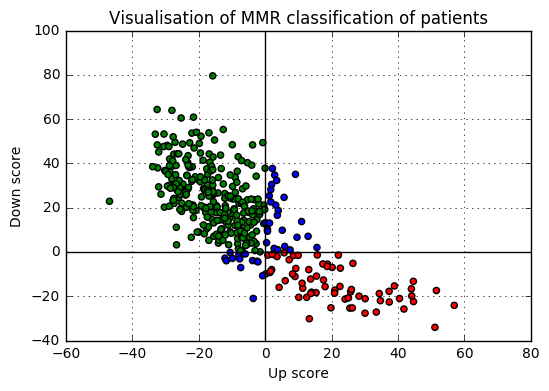

In [230]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['upscore'], results['downscore'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Up score')
plt.ylabel('Down score')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('Visualisation of MMR classification of patients')
plt.show()

RED : MSI , GREEN : MSS

# CNA

Load the dataset

In [213]:
df_cna = pd.read_table('data/data_CNA.txt')
print (len(df_cna))
print(len(df_cna.columns.values)-2)
df_cna.head()

24776
616


,Hugo_Symbol,Entrez_Gene_Id,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,...,TCGA-QG-A5YV-01,TCGA-QG-A5YW-01,TCGA-QG-A5YX-01,TCGA-QG-A5Z1-01,TCGA-QG-A5Z2-01,TCGA-QL-A97D-01,TCGA-RU-A8FL-01,TCGA-SS-A7HO-01,TCGA-T9-A92H-01,TCGA-WS-AB45-01
0,ACAP3,116983.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0
1,ACTRT2,140625.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0
2,AGRN,375790.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0
3,ANKRD65,441869.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0
4,ATAD3A,55210.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0


In [224]:
genes = df_cna['Hugo_Symbol']
real_genes = []
for g in genes:
    real_genes.append(g.split('|')[0])

In [227]:
pd.DataFrame(real_genes).to_csv('data/gene_list.csv',sep=',',index=False)

The CNA score is the number of genes for which the patient had CNA +1 or -1

In [124]:
cna = []
for p in df_cna.columns[2:]:
    nb_cna = np.count_nonzero(df_cna[p])
    #nb_mut = np.sum(mutations[p])
    cna.append([p,nb_cna])
cna = pd.DataFrame(cna)
cna.columns = ['id','cna']

try:
    results = results.drop(['cna'],axis=1)
except:
    pass
results = results.merge(cna, how='inner', on='id')
print (len(results))
results.head()

376


,id,upscore,downscore,ces,cat,label,cna
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0,15735
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0,8859
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0,18611
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0,19624
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0,6452


Attribute a mutation score to each patient

In [125]:
# mut = []
# for p in df_cna.columns[2:]:
#     nb_mut = np.count_nonzero(~pd.isnull(df_cna[p]))
#     #nb_mut = np.sum(mutations[p])
#     mut.append([p,nb_mut])
# mut = pd.DataFrame(mut)
# mut.columns = ['id','mut']

# #results = results.drop(['mut'],axis=1)
# results = results.merge(mut, how='inner', on='id')
# print (len(results))
# results.head()

CES / CNA correlation. Colors represent the MMR deficiency classification

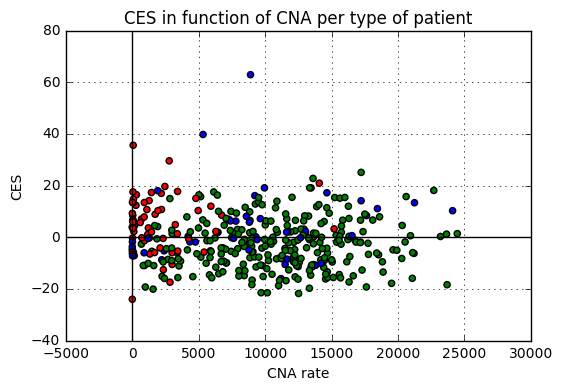

In [126]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['cna'], results['ces'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.xlabel('CNA rate')
plt.ylabel('CES')
plt.title('CES in function of CNA per type of patient')
plt.show()

RED: MSI, GREEN : MSS

It appears the MSI patients have way less CNA than MSS patients


# MLH1 study

In [127]:
df_expr = pd.read_table('data/cBioPortal_data_mlh1_expr.txt').transpose()
df_meth = pd.read_table('data/cBioPortal_data_mlh1_meth.txt').transpose()

In [128]:
df_mlh1 = df_expr.merge(df_meth, how='inner', left_index=True, right_index=True)[2:]
df_mlh1.columns = ['expr','meth']
df_mlh1.head()

,expr,meth
TCGA-D5-6531-01,-0.6444,0.018947
TCGA-DM-A28A-01,0.643,0.0248725
TCGA-DC-5869-01,2.5549,0.0623723
TCGA-F4-6460-01,0.0455,0.0460492
TCGA-DY-A1DC-01,0.2859,0.0815832


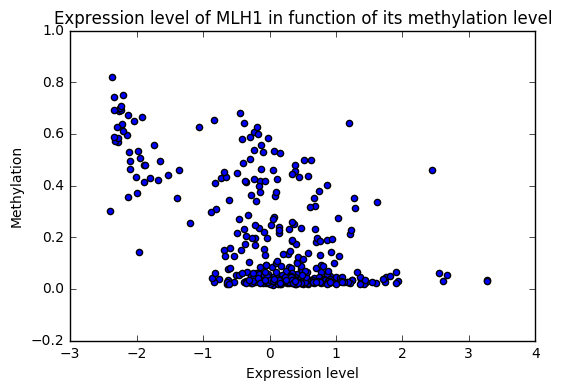

In [129]:
plt.figure()
colors=['red','green','blue']
plt.scatter(df_mlh1['expr'],df_mlh1['meth'])
plt.xlabel('Expression level')
plt.ylabel('Methylation')
plt.title('Expression level of MLH1 in function of its methylation level')
plt.show()

# Comparison CES/MLH1

In [130]:
results = results.merge(df_mlh1, left_on='id', right_index=True,how = 'inner')
results.head()

,id,upscore,downscore,ces,cat,label,cna,expr,meth
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0,15735,-0.6444,0.018947
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0,8859,0.643,0.0248725
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0,18611,2.5549,0.0623723
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0,19624,0.0455,0.0460492
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0,6452,0.2859,0.0815832


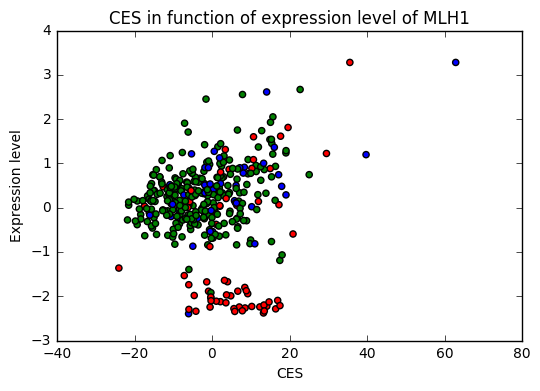

In [131]:
fig , ax = plt.subplots()
ax.scatter(results['ces'],results['expr'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CES')
plt.ylabel('Expression level')
plt.title('CES in function of expression level of MLH1')
plt.show()



RED: MSI, GREEN : MSS, BLUE : unkown


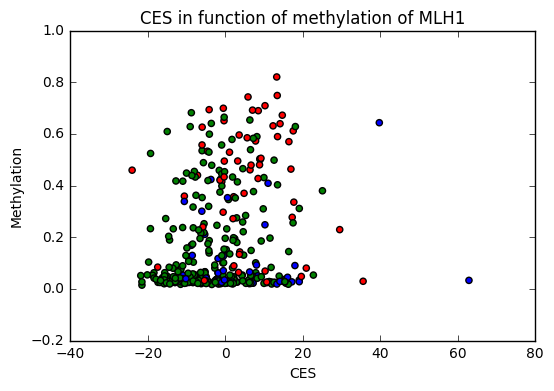

In [132]:
plt.figure()
plt.scatter(results['ces'],results['meth'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CES')
plt.ylabel('Methylation')
plt.title('CES in function of methylation of MLH1')
plt.show()

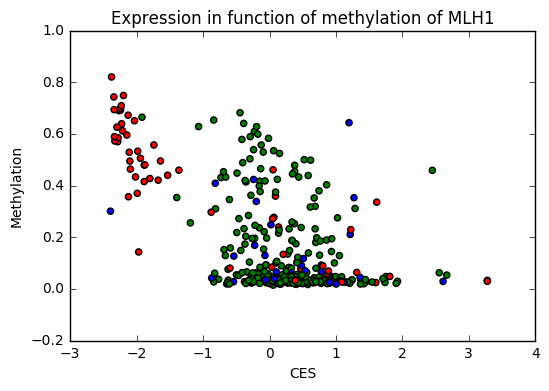

In [232]:
plt.figure()
plt.scatter(results['expr'],results['meth'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CES')
plt.ylabel('Methylation')
plt.title('Expression in function of methylation of MLH1')
plt.show()

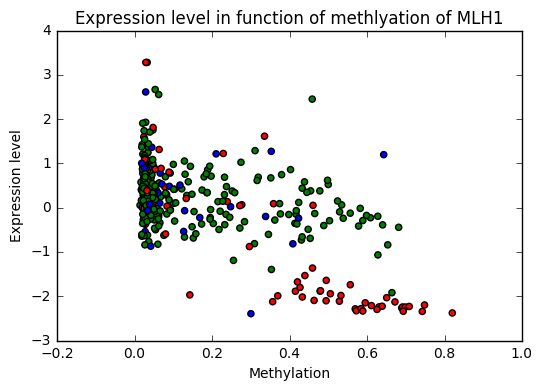

In [133]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['meth'],results['expr'] , c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Methylation')
plt.ylabel('Expression level')
plt.title('Expression level in function of methlyation of MLH1')
plt.show()

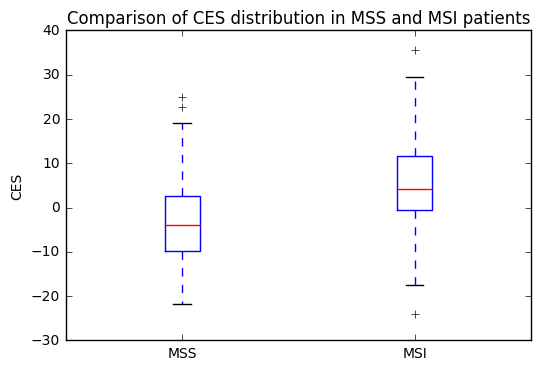

In [134]:
plt.boxplot([results[results['cat']=='mss']['ces'],results[results['cat']=='msi']['ces']],labels=['MSS','MSI'])
plt.ylabel('CES')
plt.title('Comparison of CES distribution in MSS and MSI patients')
plt.show()

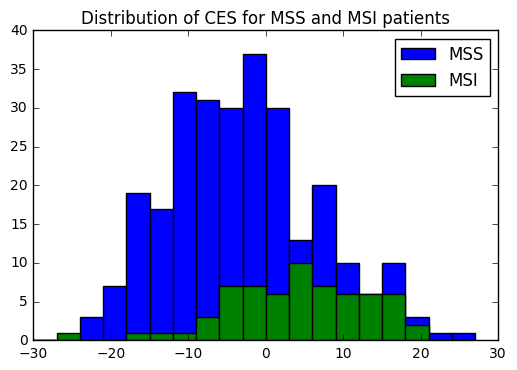

In [135]:
fig,ax 
plt.hist(results[results['cat']=='mss']['ces'],bins=range(-30,30,3), label = 'MSS')
plt.hist(results[results['cat']=='msi']['ces'],bins=range(-30,30,3), label = 'MSI')
plt.legend()
plt.title('Distribution of CES for MSS and MSI patients')
plt.show()

p-value

In [136]:
scipy.stats.ranksums(results[results['cat']=='mss']['ces'],results[results['cat']=='msi']['ces']).pvalue

1.0871722028608636e-08

# Various gene expressions

In [203]:
def get_stats(data_file, results, gene_name):
    df = pd.read_table(data_file)
    columns = df['COMMON']
    df = df.transpose()[2:]
    df.columns = columns
    return results.merge(df[[gene_name]],how='inner',left_on='id',right_index=True)[['ces','cat','id','label',gene_name]]

def show_stat(gene_name, df):
    plt.boxplot([list(df[df['cat']=='mss'][gene_name]), list(df[df['cat']=='msi'][gene_name])],
             labels=['MSS','MSI'])
    plt.ylabel(gene_name + ' expression')
    plt.title('Comparison of ' + gene_name + ' expression in MSS and MSI patients')
    plt.show()
    print('p-value of the comparision : ')
    print(scipy.stats.ttest_ind(df[df['cat']=='mss'][gene_name],df[df['cat']=='msi'][gene_name]).pvalue)
    
    fig, ax = plt.subplots()
    colors = ['red','green','blue']
    ax.scatter(df['ces'],df[gene_name] , c = df['label'],cmap = matplotlib.colors.ListedColormap(colors))
    plt.xlabel('CES')
    plt.ylabel('Expression level of '+ gene_name)
    plt.title('Expression level in function of CES')
    plt.show()

C:\Users\Ariane Lozac'hmeur\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


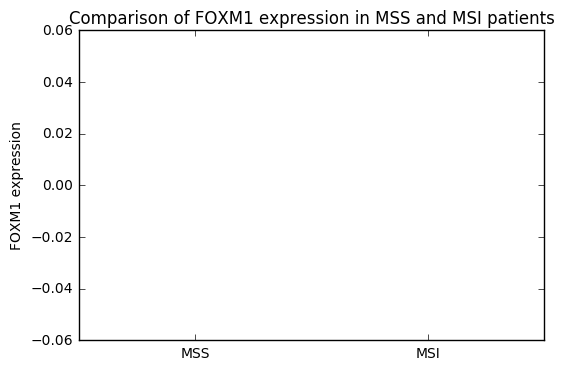

p-value of the comparision : 
nan


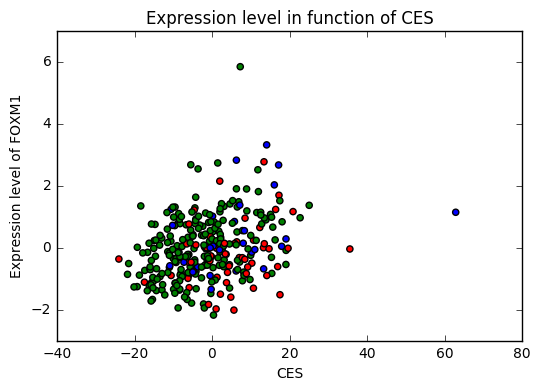

In [229]:
df_fox = get_stats('data/cBioPortal_data_expr_foxm1.txt', results, 'FOXM1')
show_stat('FOXM1',df_fox)

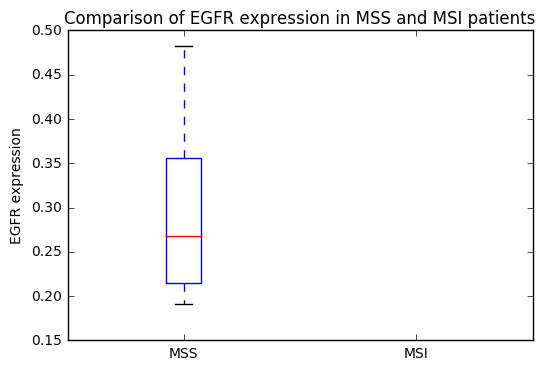

p-value of the comparision : 
nan


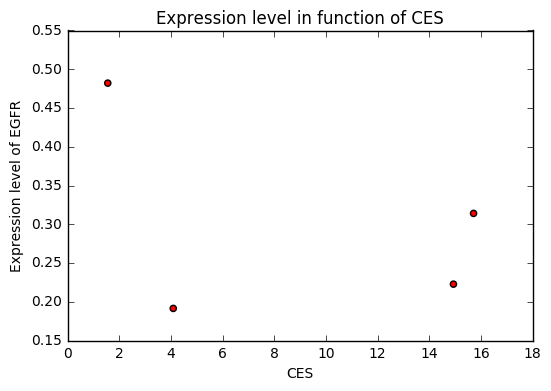

In [208]:
df_fox = get_stats('data/cBioPortal_data_expr_various.txt', results, 'EGFR')
show_stat('EGFR',df_fox)

In [ ]:
df_fox = get_stats('data/cBioPortal_data_expr_various.txt', results, 'EGFR')
show_stat('EGFR',df_fox)

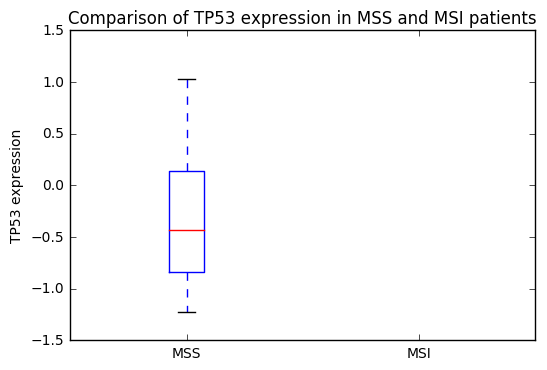

p-value of the comparision : 
nan


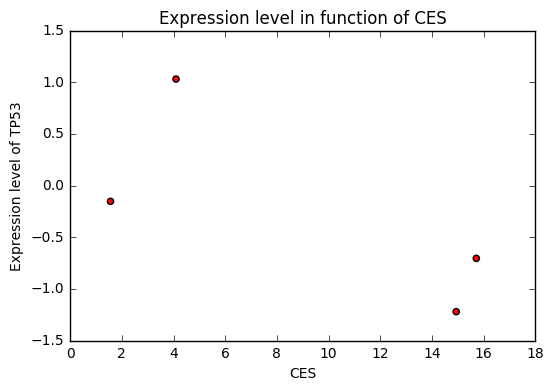

In [212]:
df_fox = get_stats('data/cBioPortal_data_expr_various.txt', results, 'TP53')
show_stat('TP53',df_fox)

In [236]:
pd.read_table('data/study_view_clinical_data.txt')['Mutation Count'].isnull().sum()

222

In [237]:
len(pd.read_table('data/study_view_clinical_data.txt')['Mutation Count'])

222

In [257]:
mutations = pd.read_table('data/mutation_count.txt')
print(len(mutations))
mutations.head()

220


,Patient ID,Sample ID,Mutation Count,CNA,Group
0,TCGA-A6-2674,TCGA-A6-2674-01,19,0.061118,Unselected
1,TCGA-A6-2677,TCGA-A6-2677-01,56,0.168704,Unselected
2,TCGA-A6-2678,TCGA-A6-2678-01,62,0.250093,Unselected
3,TCGA-A6-2683,TCGA-A6-2683-01,71,0.411158,Unselected
4,TCGA-AA-3514,TCGA-AA-3514-01,60,0.078219,Unselected


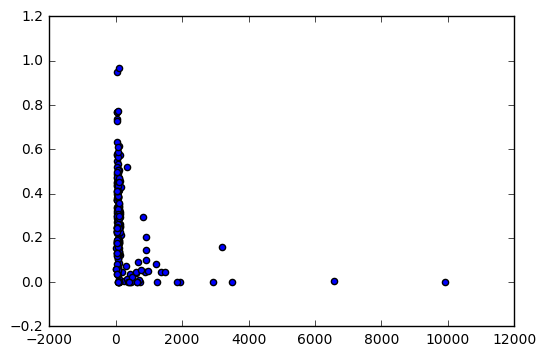

In [260]:
plt.figure()
plt.scatter(mutations['Mutation Count'], mutations['CNA'])
plt.show()

In [248]:
mutations = pd.read_table('data/Mutation Count.txt')
print(len(mutations))
mutations.head()

625


,Sample ID,Patient ID,Mutation Count
0,TCGA-AG-A002-01,TCGA-AG-A002,9927.0
1,TCGA-AA-A010-01,TCGA-AA-A010,6566.0
2,TCGA-AA-A00N-01,TCGA-AA-A00N,3506.0
3,TCGA-AA-3984-01,TCGA-AA-3984,3195.0
4,TCGA-AA-3977-01,TCGA-AA-3977,2923.0


In [249]:
results_mut = results.merge(mutations,how='inner',left_on='id',right_on='Sample ID')
print(len(results_mut))

372


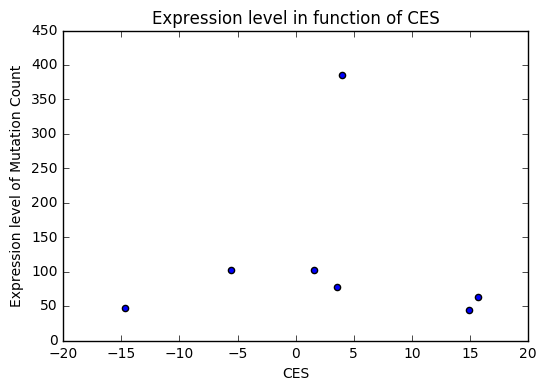

In [253]:
# plt.boxplot([list(results_mut[results_mut['cat']=='mss']['Mutation Count']), list(results_mut[results_mut['cat']=='msi']['Mutation Count'])],
#              labels=['MSS','MSI'])
# plt.ylabel('Mutation Count' + ' expression')
# plt.title('Comparison of ' + 'Mutation Count' + ' expression in MSS and MSI patients')
# plt.show()
# print('p-value of the comparision : ')
# print(scipy.stats.ttest_ind(results_mut[results_mut['cat']=='mss']['Mutation Count'],results_mut[results_mut['cat']=='msi']['Mutation Count']).pvalue)
    
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results_mut['ces'],results_mut['Mutation Count'])# , c = results_mut['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CES')
plt.ylabel('Expression level of '+ 'Mutation Count')
plt.title('Expression level in function of CES')
plt.show()

In [256]:
results_mut['Mutation Count'].isnull().sum()

365

In [266]:
df = ces.merge(mutations,how='inner',left_on='id',right_on='Sample ID')

In [267]:
len(df)

625

In [268]:
df.head()

,id,ces,Sample ID,Patient ID,Mutation Count
0,TCGA-AA-3860-01,0.0000,TCGA-AA-3860-01,TCGA-AA-3860,34.0
1,TCGA-DM-A28A-01,6.4499,TCGA-DM-A28A-01,TCGA-DM-A28A,NaN
2,TCGA-DC-5869-01,7.8741,TCGA-DC-5869-01,TCGA-DC-5869,NaN
3,TCGA-F4-6460-01,-4.8967,TCGA-F4-6460-01,TCGA-F4-6460,NaN
4,TCGA-AA-A00N-01,0.0000,TCGA-AA-A00N-01,TCGA-AA-A00N,3506.0


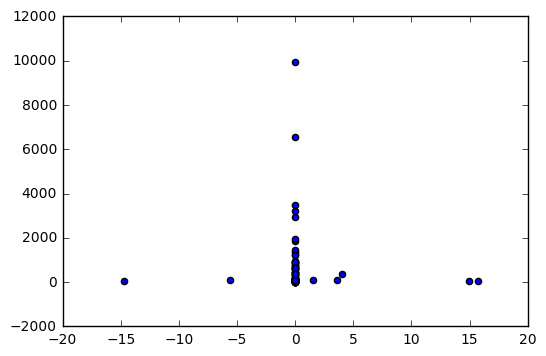

In [269]:
plt.figure()
plt.scatter(df['ces'],df['Mutation Count'])
plt.show()

Gene co-expression network analysis